In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [115]:
def plot2_2(lat,lat_s):

    #Calculation
    x = np.sin(np.deg2rad(lat))
    x_s = np.sin(np.deg2rad(lat_s))
    Q = 344. #W/m**2
    s = 1. - 0.241*(3*x**2 - 1)
    curvyA = absorption(x,x_s)
    A = 211.1 #W/m**2
    B = 1.55  #W/m**2/K
    temp = (Q*s*curvyA - A)/B

    #Plotting
    tick_locations = np.array([0.0,0.2,0.4,0.6,0.8,x_s,1.0])
    second_locations = np.trunc(np.rad2deg(np.arcsin(tick_locations)))

    fig, ax = plt.subplots(figsize = [8,4],constrained_layout=True)
    fig.suptitle("Figure 2.2")

    ax.set_xlabel(r"x ($\sin{\theta}$) [dimensionless]")
    ax.set_ylabel(r"Temperature [$^\circ$C]")
    ax.plot(x,temp,c='k',linewidth=3)
    ax.axvline(x_s,c='k',linestyle='dashed')
    ax.set_xlim(x[0],x[-1])
    ax.set_xticks(tick_locations)

    axtwinx = ax.twiny()
    axtwinx.set_xlabel(r"Latitude ($\theta$) [$^\circ$]")
    axtwinx.set_xlim(ax.get_xlim())
    axtwinx.set_xticks(tick_locations)
    axtwinx.set_xticklabels(second_locations)

    return

def plot2_3(lat_s):

    #Calculation
    x_s = np.sin(np.deg2rad(lat_s))
    s = 1. - 0.241*(3*x_s**2 - 1)
    sarray = np.tile(s, (3,1))
    q = np.zeros_like(sarray)
    print(sarray.shape)
    curvyA = np.array([0.4,0.7,(0.4 + 0.7)/2])
    for i in range(3) : q[i,:] = 1 / (sarray[i,:] * curvyA[i])
    
    #Plotting
    fig, ax = plt.subplots(figsize=[8,4],constrained_layout=True)
    fig.suptitle("Figure 2.3")

    colors = ["tab:red","tab:blue","k"]
    labels = [r"$q^+$",r"$q^-$","small conductivity"]
    for i in range(3) : ax.plot(q[i,:],lat_s,c=colors[i],label=labels[i])
    ax.set_xlabel(r"$Q / \widetilde{I_s}$ [Dimensionless]")
    ax.set_ylabel(r"Ice Lat $\theta_s$ [$^\circ$]")
    ax.legend()
    ax.set_ylim(lat_s[0],lat_s[-1])
    return

def absorption(x,x_s):
    alpha = 0.4
    beta  = 0.7
    curvyA = np.where(x>=x_s,alpha,beta)
    
    return curvyA

(3, 89)


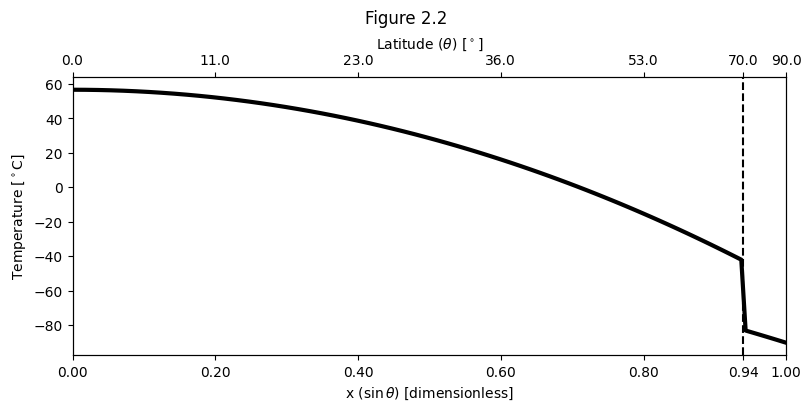

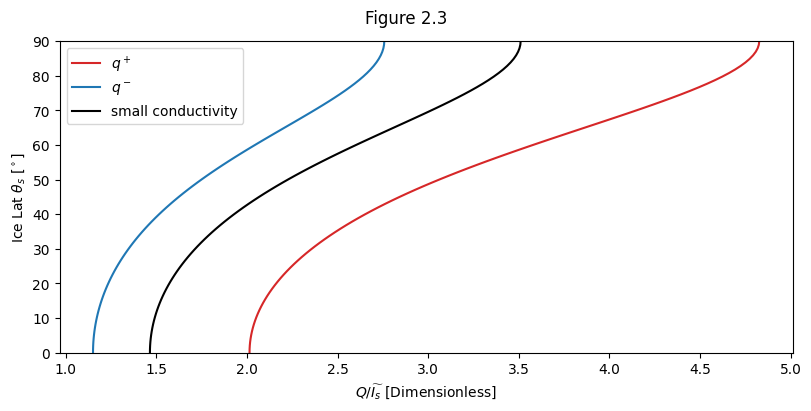

In [116]:
latitude = np.linspace(0,90,89)
plot2_2(latitude,70)
plot2_3(latitude)